In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as go
import os

# Question 1 


- nombre d'observations = 499
- période = 1983 to 2025
- 7 parametres non conserver

In [56]:
df_ch4 = pd.read_csv('ch4_mm_gl.csv',header=45)
display(df_ch4)
print(df_ch4.columns)

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.96,2.19,1635.15,1.42
1,1983,8,1983.625,1628.05,2.72,1635.64,1.36
2,1983,9,1983.708,1638.42,2.16,1636.19,1.29
3,1983,10,1983.792,1644.81,1.40,1636.81,1.21
4,1983,11,1983.875,1642.60,0.71,1637.49,1.12
...,...,...,...,...,...,...,...
494,2024,9,2024.708,1935.67,-9.99,1931.99,-9.99
495,2024,10,2024.792,1941.58,-9.99,1932.75,-9.99
496,2024,11,2024.875,1940.44,-9.99,1933.49,-9.99
497,2024,12,2024.958,1937.52,-9.99,1934.23,-9.99


Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')


# Question 2

In [ ]:
df_ch4 = df_ch4[['month', 'average']]
display(df_ch4)



,month,average
0,7,1625.96
1,8,1628.05
2,9,1638.42
3,10,1644.81
4,11,1642.60
...,...,...
494,9,1935.67
495,10,1941.58
496,11,1940.44
497,12,1937.52


# Question 3

# Question 4

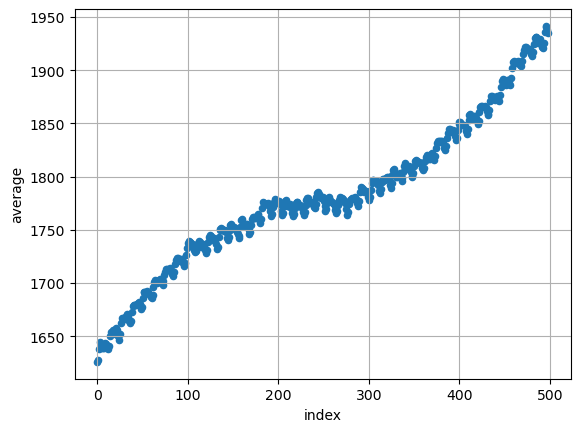

In [ ]:

df_ch4.reset_index().plot.scatter(x='index',y='average')
plt.grid(True)

Text(0.5, 1.0, "scatterplot représentant l'évolution de la moyenne mensuelle ch4")

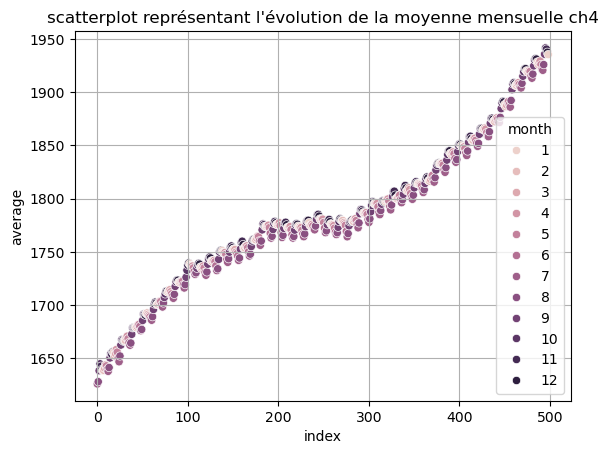

In [76]:
f = sns.scatterplot(data=df_ch4.reset_index(), x="index", y="average", hue="month",legend="full")
plt.grid(True)
plt.title("scatterplot représentant l'évolution de la moyenne mensuelle ch4")

Text(0.5, 1.0, "scatterplot représentant l'évolution de la moyenne mensuelle sf6")

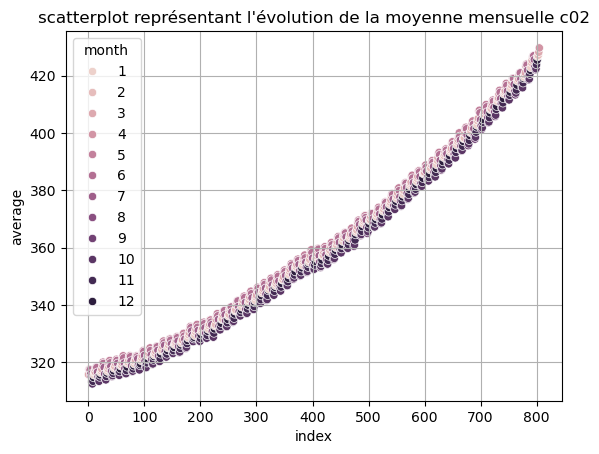

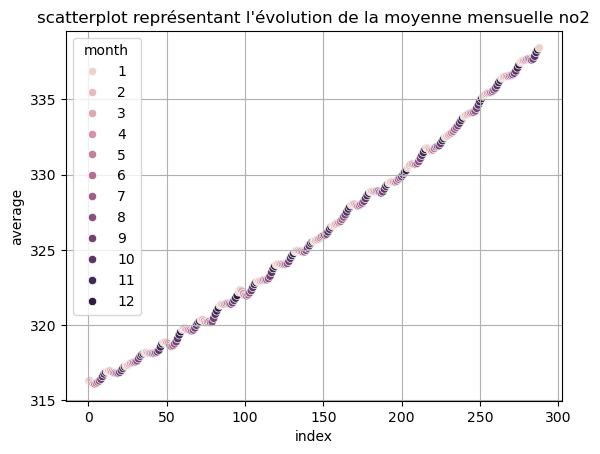

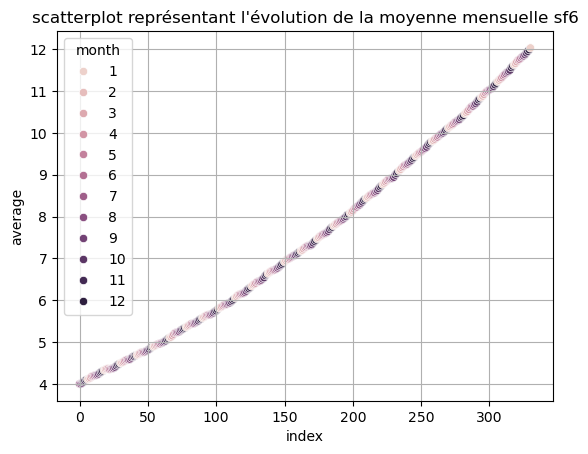

In [77]:
df_co2 = pd.read_csv('co2_mm_mlo.csv',header=40)
df_co2 = df_co2[['month', 'average']]
plt.figure()
sns.scatterplot(data=df_co2.reset_index(), x="index", y="average", hue="month",legend="full")
plt.grid(True)
plt.title("scatterplot représentant l'évolution de la moyenne mensuelle c02")

df_n2o = pd.read_csv('n2o_mm_gl.csv',header=45)
df_n2o = df_n2o[['month', 'average']]
plt.figure()
sns.scatterplot(data=df_n2o.reset_index(), x="index", y="average", hue="month",legend="full")
plt.grid(True)
plt.title("scatterplot représentant l'évolution de la moyenne mensuelle no2")

df_sf6 = pd.read_csv('sf6_mm_gl.csv',header=45)
df_sf6 = df_sf6[['month', 'average']]
plt.figure()
sns.scatterplot(data=df_sf6.reset_index(), x="index", y="average", hue="month",legend="full")
plt.grid(True)
plt.title("scatterplot représentant l'évolution de la moyenne mensuelle sf6")


ch4 et no2 semble avoir des variations saisoniere du a l'epaisseur de la courbe.

# Question 5

## Question 5.1

In [84]:
window_size = 6
smoothed_values = []
smoothed_months = []

for t in range(window_size, len(df_ch4) - window_size):
    window = df_ch4['average'].iloc[t - window_size : t + window_size + 1].values

    weighted_sum = 0.5 * window[0] + sum(window[1:-1]) + 0.5 * window[-1]
    smoothed_value = weighted_sum / 12

    smoothed_months.append(df_ch4['month'].iloc[t])
    smoothed_values.append(smoothed_value)

df_smoothed = pd.DataFrame({'month': smoothed_months, 'average_smoothed' : smoothed_values})








Il n'est pas possible de la faire sur les 6 premieres valeurs et les 6 dernieres.